# Convolução 2D

## Índice

1. Introdução
2. Importando bibliotecas
3. Funções utilizadas
4. Criação e aplicação dos filtros

---

## 1. Introdução

- Feito por: Kenzo Inanami de Faria <br>
- Imagem utilizada: https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_gray.bmp <br>
- Filtros aplicados:

  - Filtro da média 5 x 5
  - Filtro Gaussiano 5 x 5
  - Filtro Laplaciano 3 x 3
  - Filtro Laplaciano da Gaussiana 7 x 7


## 2. Importando bibliotecas


In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

## 3. Funções utilizadas


Para construção do filtro laplassiano da gaussiana


In [6]:
def LoG(sigma, x, y):
    # Fonte: https://math.stackexchange.com/a/2449063
    laplace = -1 / (np.pi * sigma ** 4) * (1 - (x ** 2 + y ** 2) / (2 * sigma ** 2)) * np.exp(
        -(x ** 2 + y ** 2) / (2 * sigma ** 2))
    return laplace
def LoG_discrete(sigma, n):
    # Fonte: https://math.stackexchange.com/a/2449063
    l = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            l[i, j] = LoG(sigma, (i - (n - 1) / 2), (j - (n - 1) / 2))
    return l

Para aplicação dos filtros na imagem


In [7]:
def calc(h, img, i, j):
    # Faz os somatórios do algoritmo de convolução para a posição i j da imagem
    aux = 0
    for x in range(len(h)):
        for y in range(len(h[0])):
            aux += h[x][y] * img[i - x][j - y]

    return int(aux)


def apply_filter(img, h):
    # Passa o kernel pela imagem
    fimg = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            fimg[i][j] = calc(h, img, i, j)

    return fimg

## 4. Criação e aplicação dos filtros


Importando a imagem


In [2]:
lena = skimage.io.imread('Imagens/lena_gray.bmp')

Criando os filtros


In [9]:
# MÉDIA
h_mean = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        h_mean[i][j] = 1 / 25

# GAUSSIANO
h_gauss = [[1, 4, 6, 4, 1],
           [4, 16, 24, 16, 4],
           [6, 24, 36, 24, 6],
           [4, 16, 24, 16, 4],
           [1, 4, 6, 4, 1]]
for i in range(5):
    for j in range(5):
        h_gauss[i][j] = h_gauss[i][j] / 256

# LAPLACIANO
h_lapla = [[0, -1, 0],
           [-1, 5, -1],
           [0, -1, 0]]
for i in range(3):
    for j in range(3):
        h_lapla[i][j] = h_lapla[i][j] / 256

# LAPLASSIANO DA GAUSSIANA
h_LoG = LoG_discrete(4, 7)

Aplicando e mostrando o resultado


Iniciando a Convolução com: Média 5x5
Termino de Convolução com: Média 5x5
Iniciando a Convolução com: Gaussiano 5x5
Termino de Convolução com: Gaussiano 5x5
Iniciando a Convolução com: Laplaciano 3x3
Termino de Convolução com: Laplaciano 3x3
Iniciando a Convolução com: Laplaciano da Gaussiana 7 x 7
Termino de Convolução com: Laplaciano da Gaussiana 7 x 7


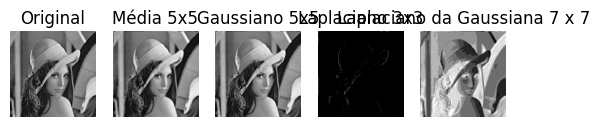

In [11]:
# Organizando os filtros para iteração
filters = {'Média 5x5': h_mean,
           'Gaussiano 5x5': h_gauss,
           'Laplaciano 3x3': h_lapla,
           'Laplaciano da Gaussiana 7 x 7': h_LoG}


# Para mostrar as imagens
fig, ax = plt.subplots(1, 5)

# Inserindo a original para comparação
ax.ravel()[0].imshow(lena, cmap=plt.cm.gray)
ax.ravel()[0].set_title('Original')
ax.ravel()[0].axis('off')

# Iterando e aplicando os filtros na imagem
i = 1
for name, filter in filters.items():
    print(f'Iniciando a Convolução com: {name}')
    img2 = apply_filter(lena, filter)
    print(f'Termino de Convolução com: {name}')

    # Inserindo imagem para visualização
    ax.ravel()[i].imshow(img2, cmap=plt.cm.gray)
    ax.ravel()[i].set_title(name)
    ax.ravel()[i].axis('off')

    i += 1

plt.show()